## Density cross-sections along and across the canyon 

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.gridspec as gspec
import numpy as np
import seaborn as sns
import scipy.stats
import pandas as pd
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import os
import sys
import warnings
warnings.filterwarnings("ignore")

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [31]:
def plot_w(state, title):
    sns.set_style('dark')
    sns.set_context('talk')
    plt.rcParams['font.size'] = 14.0
    f = plt.figure(figsize = (10,8)) # 190mm = 7.48 in, 115mm = 4.5in

    gs = gspec.GridSpec(2, 1, width_ratios=[1],height_ratios=[1,0.7],wspace=0.2)
    gs0 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0],hspace=0.1)
    gs1 = gspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1],hspace=0.1)

    ax0 = plt.subplot(gs0[0])
    ax1 = plt.subplot(gs0[1])
    ax2 = plt.subplot(gs1[0])

    t=4 # days

    #%%%%%%%%%%%%% Contours density Alongshelf %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    tslice = slice(6,8)
    yslice = 261
    xslice = slice(120,240)

    # - - - - Tracer - - - - - - 
    w_min = -0.007
    w_max = 0.007 
    csU = np.linspace(w_min,w_max,num=30)
    csU2 = np.linspace(w_min,w_max,num=16)

    mesh = ax0.contourf(grid.X[xslice]/1000,grid.Z[:48],
                        np.ma.array(np.nanmean(state.W[tslice,:48,yslice,xslice].data,axis=0),
                                    mask=MaskC[:48,yslice,xslice]),
                        csU,cmap=cmo.cm.delta)
    #CS2 = ax0.contour(grid.X[xslice]/1000,grid.Z[:48],
    #                     np.ma.array(np.nanmean(state.W[tslice,:48,yslice,xslice].data,axis=0),
    #                                mask=MaskC[:48,yslice,xslice]),
    #                    csU2,cmap=cmo.cm.delta)
    #plt.clabel(CS2,csU2[::4],inline=True, fmt='%.1f',fontsize=10)

    # - - - - extras - - - - - - - 
    ax2.text(1.05,-0.15,'($ms^{-1}$)',transform=ax2.transAxes)
    ax0.set_ylabel('Depth (m)',labelpad=0.0)
    ax0.set_xlabel('Alongshelf distance (km)',labelpad=0.0)
    ax0.tick_params(axis='x', pad=1)
    ax0.tick_params(axis='y', pad=1)
    ax0.axvline(grid.X[200]/1000,linestyle='--',color='0.5')
    ax0.plot(grid.X[xslice]/1000,-grid.Depth[267,xslice],':',color='0.5',linewidth=3)
    ax0.axhline(-grid.Depth[226,100],linestyle=':',color='0.5',linewidth=3)
    ax0.set_title(title)
    
    #%%%%%%%%%%%%% Contours density cross-shore %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    yslice = slice(220,270)
    xslice = 200

    mesh=ax1.contourf(grid.Y[yslice]/1000,grid.Z[:48],
                     np.ma.array(np.nanmean(state.W[tslice,:48,yslice,xslice].data,axis=0),
                                 mask=MaskC[:48,yslice,xslice]),
                     csU,cmap=cmo.cm.delta)
    cbar_ax = f.add_axes([0.91, 0.48, 0.02, 0.4])
    cb=f.colorbar(mesh, cax=cbar_ax,ticks=[-0.006,-0.004,-0.002,0,0.002,0.004,0.006],format='%1.3f')
    cb.ax.yaxis.set_tick_params(pad=1)

    #CS3 = ax1.contour(grid.Y[yslice]/1000,grid.Z[:48],
    #                np.ma.array(np.nanmean(state.W[tslice,:48,yslice,xslice].data,axis=0), 
    #                             mask=MaskC[:48,yslice,xslice]),csU2,colors='k',linewidths=[0.75] )
    #plt.clabel(CS3,csU2[::4],inline=True, fmt='%.1f',fontsize=10)

    # - - - - - extras - - - - --
    ax1.axvline(grid.Y[261]/1000,linestyle='--',color='0.5')
    ax1.plot(grid.Y[yslice]/1000,-grid.Depth[yslice,100],':',color='0.5',linewidth=3)
    ax1.set_xlabel('CS distance (km)',labelpad=0.0)
    ax1.tick_params(axis='x', pad=1)
    ax1.tick_params(axis='y', pad=1)

    #%%%%%%%%%%%%% Contours density rim depth %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    yslice = slice(215,270)
    xslice = slice(110,250)
     
    csU = np.linspace(w_min,w_max,num=30)
    csU2 = np.linspace(w_min,w_max,num=16)
    
    mesh=ax2.contourf(grid.X[xslice]/1000,grid.Y[yslice]/1000,
                     np.ma.array(np.nanmean(state.W[tslice,26,yslice,xslice].data,axis=0),
                                 mask=MaskC[26,yslice,xslice]),
                     csU,cmap=cmo.cm.delta)
    cbar_ax = f.add_axes([0.78, 0.12, 0.02, 0.29])
    cb=f.colorbar(mesh, cax=cbar_ax,ticks=[-0.006,-0.004,-0.002,0,0.002,0.004,0.006],format='%1.3f')
    cb.ax.yaxis.set_tick_params(pad=1)

    #CS4 = ax2.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,
    #                 np.ma.array(np.nanmean(state.W[:,26,:,:].data-1000,axis=0),mask=MaskC[26,yslice,xslice]),
    #                 csU2,colors='k',linewidths=[0.75] )
    #plt.clabel(CS4,csU2,inline=True, fmt='%.2f',fontsize=10)

    # - - - - - extras - - - - --
    ax2.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,-grid.Depth[yslice,xslice],levels=[-147.5],
                linestyle='--',color='0.5')
    ax2.plot(grid.X[200]/1000, grid.Y[261]/1000,'^',color='red', alpha=0.5)
    
    ax2.set_xlabel('CS distance (km)',labelpad=0.0)
    ax2.tick_params(axis='x', pad=1)
    ax2.tick_params(axis='y', pad=1)

    ax2.set_aspect(1)
    
    plt.show()

In [3]:
grid_file1 = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
state_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/stateGlob.nc'

with Dataset(grid_file1, 'r') as nbl:
    Z1 = nbl.variables['RC'][:]
    Zw = nbl.variables['RF'][:]
    hfac = nbl.variables['HFacC'][:,:,:]
    hfacW = nbl.variables['HFacW'][:,:,:]
    hfacS = nbl.variables['HFacS'][:,:,:]
with Dataset(state_file2,'r') as stfl:
    time = stfl.variables['T'][:]
    
nx = 616
ny = 360
nz = 90

#RhoRef = np.squeeze(rdmds('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/RhoRef'))
RhoRef = 999.79998779 # It is constant in all my runs, can't run rdmds

In [4]:
# Grid, state and tracers datasets of base case
grid_file = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run16/gridGlob.nc'
grid = xr.open_dataset(grid_file)

state_file = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run16/stateGlob.nc' 
state = xr.open_dataset(state_file)

state_file2 = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
state_base = xr.open_dataset(state_file2)

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

hFacSmasked = np.ma.masked_values(grid.HFacS.data, 0)
MaskS = np.ma.getmask(hFacSmasked)

hFacWmasked = np.ma.masked_values(grid.HFacW.data, 0)
MaskW = np.ma.getmask(hFacWmasked)


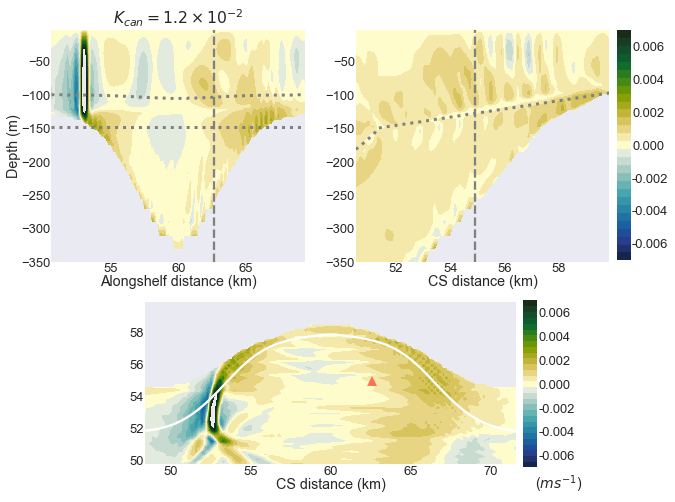

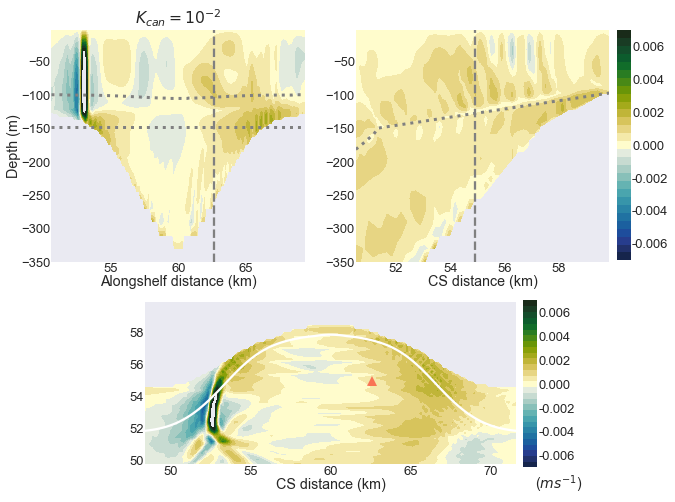

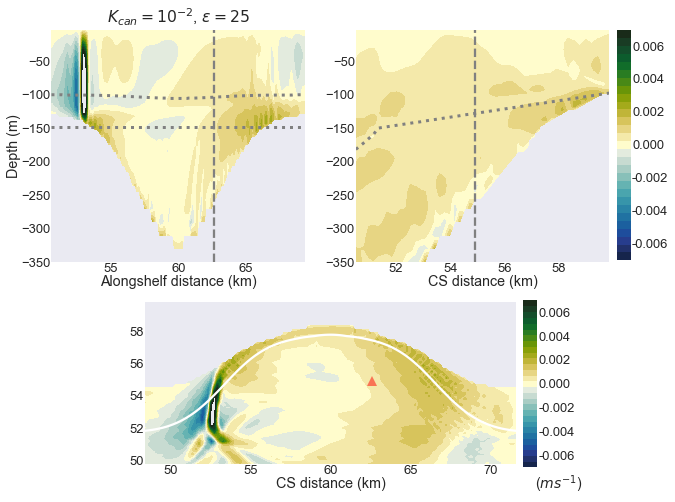

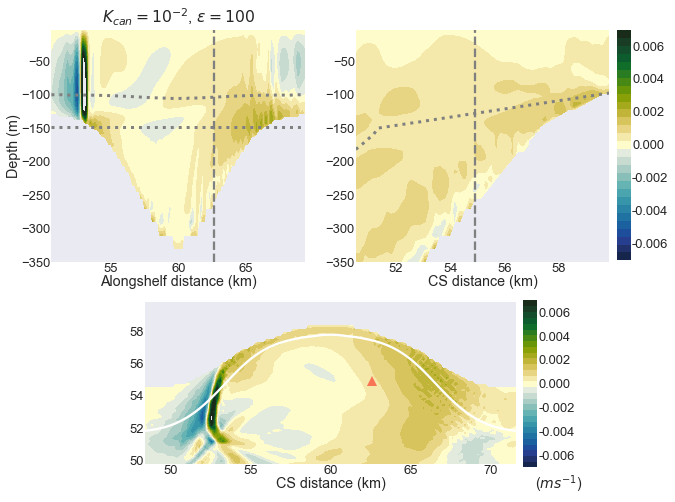

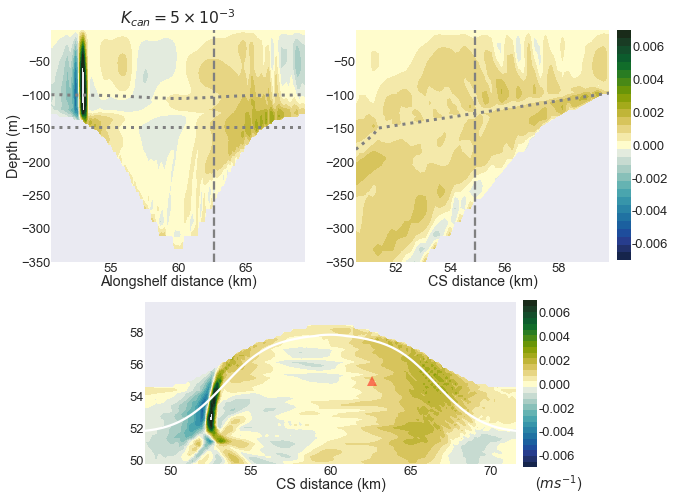

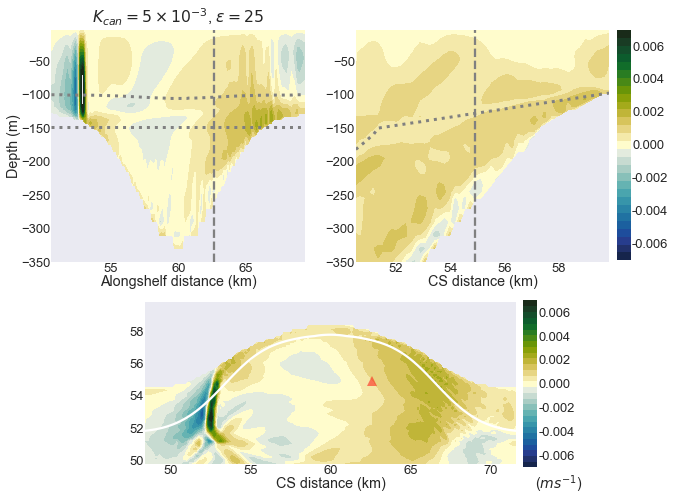

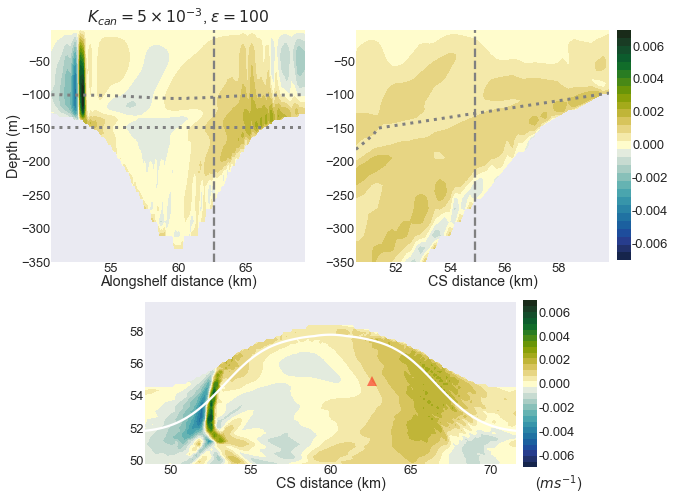

In [29]:
runs = ['run24', 'run27', 'run08','run10', 'run17', 'run21', 'run22']
labels = [r'$K_{can}=1.2\times10^{-2}$',r'$K_{can}=10^{-2}$',r'$K_{can}=10^{-2}$, $\epsilon=25$',
          r'$K_{can}=10^{-2}$, $\epsilon=100$',r'$K_{can}=5\times10^{-3}$',r'$K_{can}=5\times10^{-3}$, $\epsilon=25$',
          r'$K_{can}=5\times10^{-3}$, $\epsilon=100$'
         ]
for run,lab in zip(runs, labels):
    sfile = ('/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/%s/stateGlob.nc' %run)
    st = xr.open_dataset(sfile)
    
    plot_w(st, lab)

### Depth by depth

In [40]:
def plot_w_cont(ax,state,zz,levels):
    mesh=ax.contourf(grid.X[xslice]/1000,grid.Y[yslice]/1000,
                     np.ma.array(np.nanmean(state.W[tslice,zz,yslice,xslice].data,axis=0),
                                mask=MaskC[zz,yslice,xslice]),
                     levels,cmap=cmo.cm.delta)
    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.77])
    cb=fig.colorbar(mesh, cax=cbar_ax,ticks=[-0.003,-0.002,-0.001,0,0.001,0.002,0.003],format='%1.3f')
    cb.ax.yaxis.set_tick_params(pad=1)

    ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,-grid.Depth[yslice,xslice],levels=[-147.5],
                linestyle='--',color='0.5')
    ax.plot(grid.X[200]/1000, grid.Y[261]/1000,'^',color='red', alpha=0.5)
    ax.set_aspect(1)
    ax.set_title('%1.1f m' %Zw[zz])

def plot_v_cont(ax,state,zz,levels):
    mesh=ax.contourf(grid.X[xslice]/1000,grid.Y[yslice]/1000,
                     np.ma.array(np.nanmean(state.V[tslice,zz,yslice,xslice].data,axis=0),
                                mask=MaskS[zz,yslice,xslice]),
                     levels,cmap=cmo.cm.delta)
    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.8])
    cb=fig.colorbar(mesh, cax=cbar_ax)
    cb.ax.yaxis.set_tick_params(pad=1)

    ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,-grid.Depth[yslice,xslice],levels=[-147.5],
                linestyle='--',color='0.5')
    ax.plot(grid.X[200]/1000, grid.Y[261]/1000,'^',color='red', alpha=0.5)
    ax.set_aspect(1)
    ax.set_title('%1.1f m' %Zw[zz])

def plot_u_cont(ax,state,zz,levels):
    mesh=ax.contourf(grid.X[xslice]/1000,grid.Y[yslice]/1000,
                     np.ma.array(np.nanmean(state.U[tslice,zz,yslice,xslice].data,axis=0),
                                mask=MaskW[zz,yslice,xslice]),
                     levels,cmap=cmo.cm.delta)
    cbar_ax = fig.add_axes([0.92, 0.12, 0.02, 0.8])
    cb=fig.colorbar(mesh, cax=cbar_ax)
    cb.ax.yaxis.set_tick_params(pad=1)

    ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,-grid.Depth[yslice,xslice],levels=[-147.5],
                linestyle='--',color='0.5')
    ax.plot(grid.X[200]/1000, grid.Y[261]/1000,'^',color='red', alpha=0.5)
    ax.set_aspect(1)
    ax.set_title('%1.1f m' %Zw[zz])


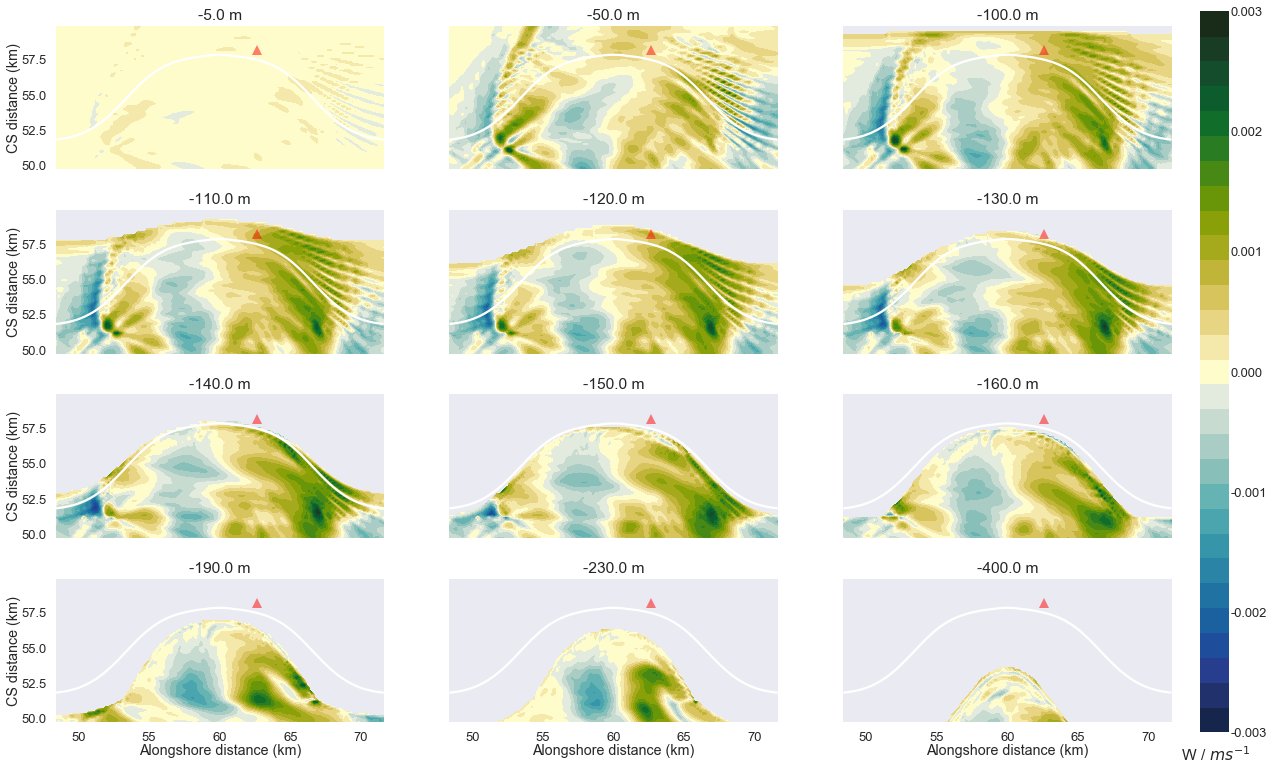

In [41]:
sns.set_style('dark')
sns.set_context('talk')
fig, ax = plt.subplots(4, 3,figsize = (20,13), sharey = True, sharex = True)

tslice = slice(8,18)
yslice = 245
xslice = slice(120,240)

w_min = -0.003
w_max = 0.003
csU = np.linspace(w_min,w_max,num=30)
csU2 = np.linspace(w_min,w_max,num=16)

#%%%%%%%%%%%%% Contours %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
yslice = slice(215,270)
xslice = slice(110,250)
     
csU = np.linspace(w_min,w_max,num=30)
depths = np.array([[1,10,20],[22,24,26],[28,30,32],[36,40,50]])
for ii in range(3):
    for jj in range(4):
        plot_w_cont(ax[jj,ii],state_base,depths[jj,ii],csU)
    
ax[0,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[1,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[2,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[3,0].set_ylabel('CS distance (km)',labelpad=0.0)

ax[3,0].set_xlabel('Alongshore distance (km)',labelpad=0.0)
ax[3,1].set_xlabel('Alongshore distance (km)',labelpad=0.0)
ax[3,2].set_xlabel('Alongshore distance (km)',labelpad=0.0)

ax[3,2].text(72,47, r' W / $ms^{-1}$')
plt.show()    


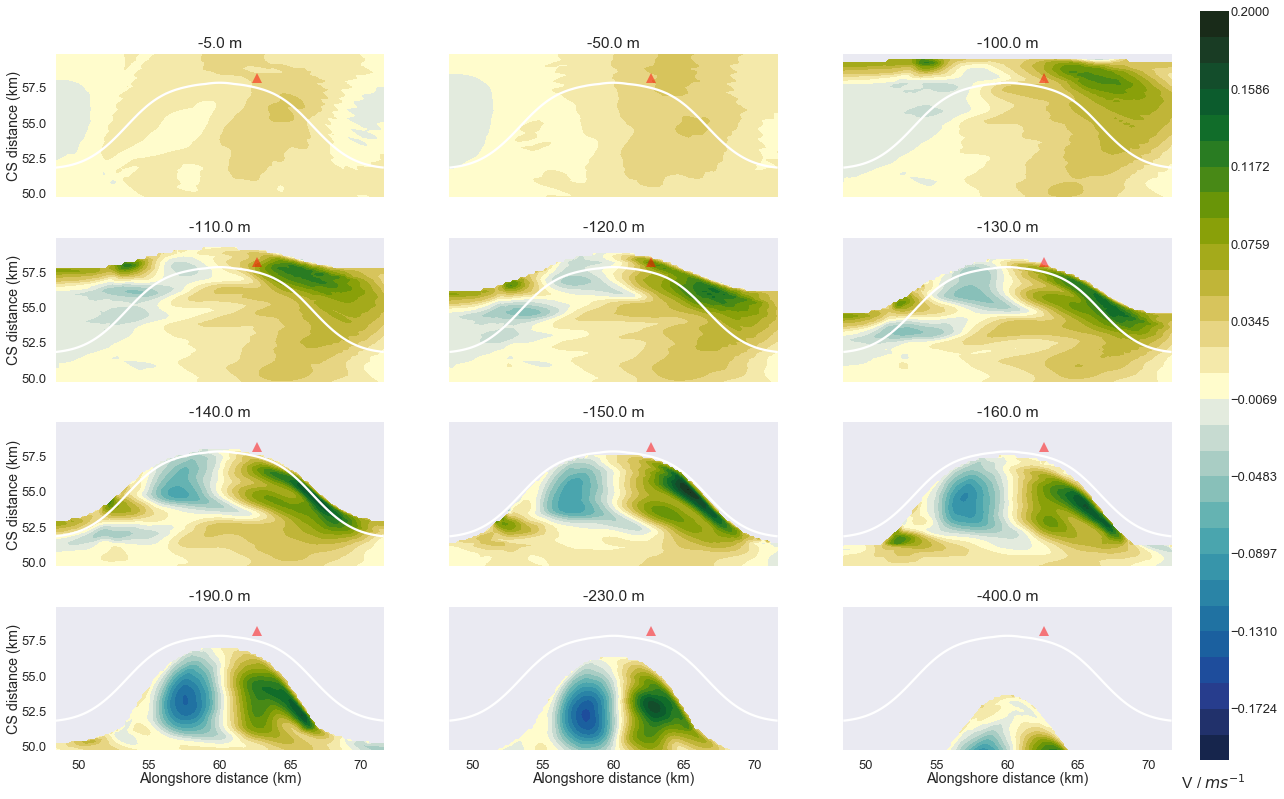

In [42]:
sns.set_style('dark')
sns.set_context('talk')
fig, ax = plt.subplots(4, 3,figsize = (20,13), sharey = True, sharex = True)

tslice = slice(8,18)
yslice = 245
xslice = slice(120,240)

v_min = -0.2
v_max = 0.2
csU = np.linspace(v_min,v_max,num=30)

yslice = slice(215,270)
xslice = slice(110,250)
     
depths = np.array([[1,10,20],[22,24,26],[28,30,32],[36,40,50]])

for ii in range(3):
    for jj in range(4):
        plot_v_cont(ax[jj,ii],state_base,depths[jj,ii],csU)
    
ax[0,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[1,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[2,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[3,0].set_ylabel('CS distance (km)',labelpad=0.0)

ax[3,0].set_xlabel('Alongshore distance (km)',labelpad=0.0)
ax[3,1].set_xlabel('Alongshore distance (km)',labelpad=0.0)
ax[3,2].set_xlabel('Alongshore distance (km)',labelpad=0.0)

ax[3,2].text(72,47, r' V / $ms^{-1}$')
plt.show()    


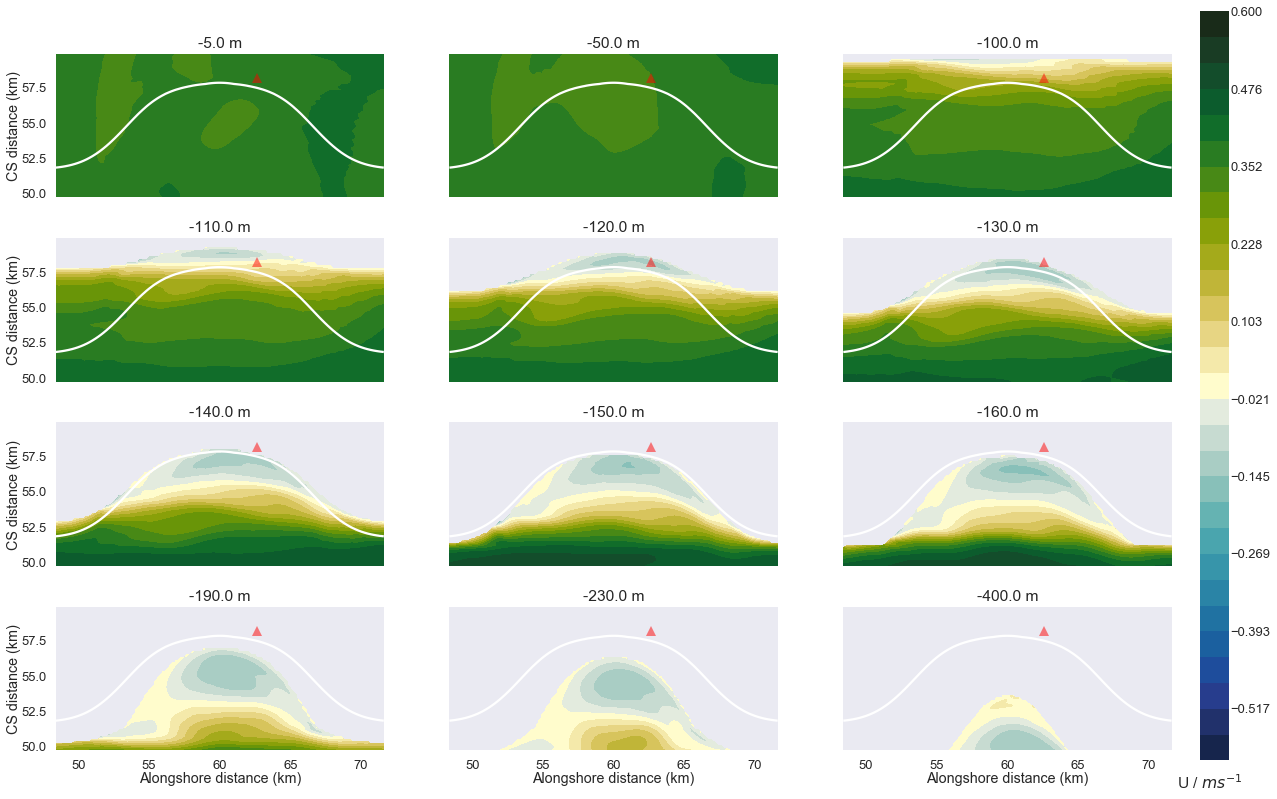

In [43]:
sns.set_style('dark')
sns.set_context('talk')
fig, ax = plt.subplots(4, 3,figsize = (20,13), sharey = True, sharex = True)

tslice = slice(8,18)
yslice = 245
xslice = slice(120,240)

u_min = -0.6
u_max = 0.6
csU = np.linspace(u_min,u_max,num=30)

yslice = slice(215,270)
xslice = slice(110,250)
     
depths = np.array([[1,10,20],[22,24,26],[28,30,32],[36,40,50]])

for ii in range(3):
    for jj in range(4):
        plot_u_cont(ax[jj,ii],state_base,depths[jj,ii],csU)
    
ax[0,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[1,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[2,0].set_ylabel('CS distance (km)',labelpad=0.0)
ax[3,0].set_ylabel('CS distance (km)',labelpad=0.0)

ax[3,0].set_xlabel('Alongshore distance (km)',labelpad=0.0)
ax[3,1].set_xlabel('Alongshore distance (km)',labelpad=0.0)
ax[3,2].set_xlabel('Alongshore distance (km)',labelpad=0.0)

ax[3,2].text(72,47, r'U / $ms^{-1}$')
plt.show()    


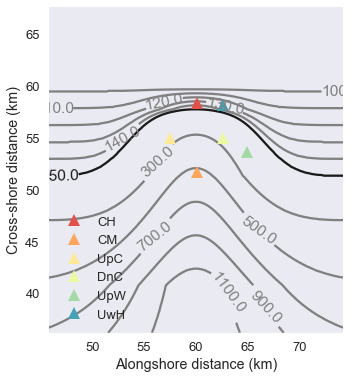

In [39]:
# Set necessary grid variables and grid file
grid = xr.open_dataset('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC

# station locations
ys = [262,227,245,245,238, 261]
xs = [180,180,160,200,215, 200]

station_names = ['CH','CM','UpC','DnC','UpW','UwH']

fig,ax = plt.subplots(1,1,figsize=(8,6))

cntr = ax.contour(grid.X[100:260]/1000,grid.Y[120:300]/1000,grid.Depth[120:300,100:260],
                  [50,100,110,120,130,140,150,300,500,700,900,1100],
                  colors=['0.5','0.5','0.5','0.5','0.5','0.1','0.5','0.5','0.5','0.5','0.5','0.5'])
ax.clabel(cntr,fmt='%0.1f')

sns.set_palette('Spectral',6)
for x,y,stn_name in zip(xs,ys,station_names):
    ax.plot(grid.X[x]/1000,grid.Y[y]/1000,'^',markersize=12,label=stn_name)

ax.legend(loc=0,ncol=1, mode="expand")
ax.set_xlabel('Alongshore distance (km)')
ax.set_ylabel('Cross-shore distance (km)')
ax.set_aspect(1)